# Salary Prediction Project of US Baseball Major League Players with Thirteen Different Machine Learning Models

In this project, thirteen different machine learning models will be employed to predict salary of any US Major Baseball League player. The Hitters data described below will be used to predict the salaries of baseball players. The data will be retrieved from "https://www.kaggle.com"

 
 
 
### Description
    
#### Context

This dataset is part of the R-package ISLR and is used in the related book by G. James et al. (2013) "An Introduction to Statistical Learning with applications in R" to demonstrate how Ridge regression and the LASSO are performed using R.

#### Content
This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

#### Format

A data frame with 322 observations of major league players on the following 20 variables.

- AtBat Number of times at bat in 1986
- Hits Number of hits in 1986
- HmRun Number of home runs in 1986
- Runs Number of runs in 1986
- RBI Number of runs batted in in 1986
- Walks Number of walks in 1986
- Years Number of years in the major leagues
- CAtBat Number of times at bat during his career
- CHits Number of hits during his career
- CHmRun Number of home runs during his career
- CRuns Number of runs during his career
- CRBI Number of runs batted in during his career
- CWalks Number of walks during his career
- League A factor with levels A and N indicating player’s league at the end of 1986
- Division A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts Number of put outs in 1986
- Assists Number of assists in 1986
- Errors Number of errors in 1986
- Salary 1987 annual salary on opening day in thousands of dollars
- NewLeague A factor with levels A and N indicating player’s league at the beginning of 1987

Acknowledgements
Please cite/acknowledge: Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York. 




In [1]:
# Installing external libraries

!pip install xgboost
!pip install lightgbm
!pip install catboost

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [3]:
# Reading Hitters data from kaggle server

df = pd.read_csv("../input/hitters/Hitters.csv")  

### Understanding Data

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [7]:
df.shape

(322, 20)

In [8]:
# detecting missing values 

df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

Salary variable has 59 missing values

In [9]:
#For visualizing missing values I need to install below package
# When you are working with anaconda you may need this installation

conda install -c conda-forge/label/cf202003 missingno


SyntaxError: invalid syntax (<ipython-input-9-11728e76be77>, line 4)

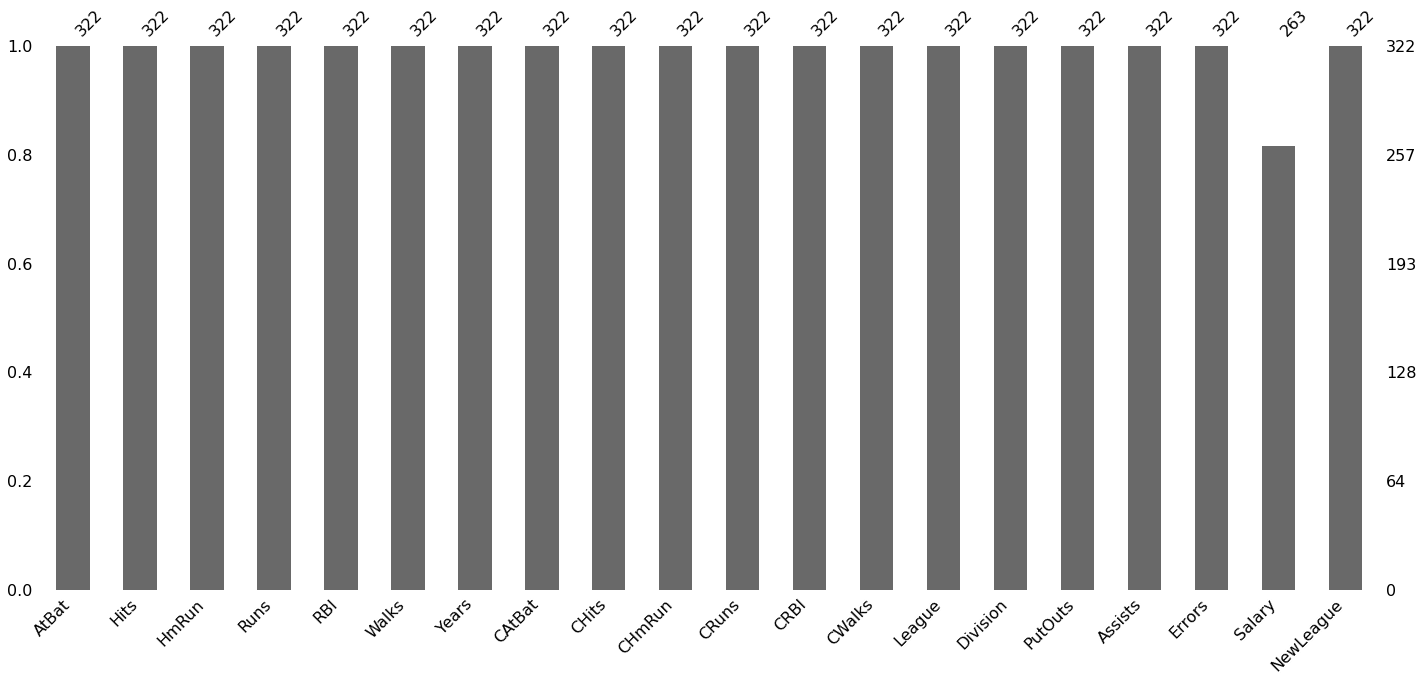

In [10]:
#Visualizing missing values

import missingno as msno
msno.bar(df);

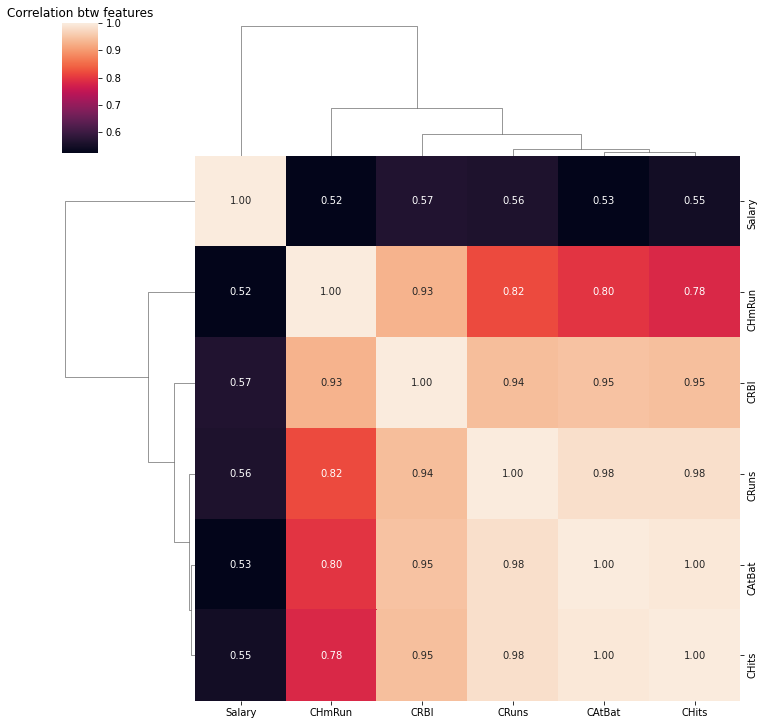

In [11]:
#Correlation values more than 0.5 between features (Because of >0.5 I can only see the values above 0.5)

correlation_matrix = df.corr().round(2)
filtre=np.abs(correlation_matrix['Salary'])>0.50
corr_features=correlation_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt=".2f")
plt.title('Correlation btw features')
plt.show()

In [12]:
# Even though there are very high correlation between some of the variables I will not do anything. Normally this problem should be solved.
# Here I will delete missing values

df = df.dropna()

In [13]:
df.shape

(263, 20)

In [14]:
df.sort_values('Salary', ascending = False).head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
163,618,200,20,98,110,62,13,7127,2163,351,1104,1289,564,A,E,330,16,8,2412.500,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,A,E,1377,100,6,1975.000,A
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,N,E,229,453,15,1940.000,N


In [15]:
# I have 3 categorical variables

df['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [16]:
df['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [17]:
df['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [18]:
# Transforming nominal variables with one hot encoding method. Normally label encoding variable can be applied for dummy variables. One hot encoding is appropriate for the nominal variables have 3 or more categories 

df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)

In [19]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [20]:
# For detecting outliers I will use LocalOutlierFactor. I will use default values of 20 and 'auto'.

clf=LocalOutlierFactor(n_neighbors=20, contamination='auto')
clf.fit_predict(df)
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-6.22764656, -4.12325749, -3.14372723, -2.46482586, -2.37903838,
       -1.93271815, -1.92868899, -1.90888428, -1.6775256 , -1.66536304,
       -1.62626849, -1.48361164, -1.48216262, -1.44345727, -1.43603775,
       -1.42239393, -1.40734739, -1.38353101, -1.37252134, -1.3532077 ])

In [21]:
?LocalOutlierFactor

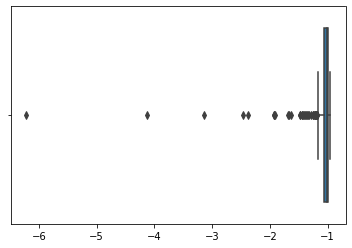

In [22]:
# I will take the 5th value as  threshold while the values after fift values decreasing closely
# However at first I will visualize this situation regarding outliers

sns.boxplot(df_scores);

In [23]:
threshold=np.sort(df_scores)[5]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-1.9327181498464339


In [24]:
df.shape

(257, 20)

In [25]:
# Standardization
# I will make some operations in the below rows.
# Salary is my dependent variable, others are dummy variables. At first I will drop them from my independent variable set (X)
#At last I will combine all of the independent variables

df_X=df.drop(['Salary','League_N','Division_W','NewLeague_N'], axis=1)
df_X.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9
1,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19
2,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0
3,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22
4,202,53,4,31,26,27,9,1876,467,15,192,186,161,304,45,11


In [26]:
from sklearn.preprocessing import StandardScaler
scaled_cols=StandardScaler().fit_transform(df_X)



scaled_cols=pd.DataFrame(scaled_cols, columns=df_X.columns)
scaled_cols.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743
1,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756
2,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969
3,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660
4,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346


In [27]:
cat_df=df.loc[:, "League_N":"NewLeague_N"]
cat_df.head()

,League_N,Division_W,NewLeague_N
0,0,1,0
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1


In [28]:
Salary=pd.DataFrame(df['Salary'])

In [29]:
df=pd.concat([Salary,scaled_cols, cat_df], axis=1)
df.head()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,100.000,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743,0,1,0
1,75.000,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756,1,1,1
2,1100.000,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969,0,0,0
3,517.143,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660,0,0,0
4,512.500,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346,1,1,1


In [30]:
# Dependent variable y = Salary, independents variables x = the variables without salary

y = df['Salary']
X = df.drop('Salary', axis =1)

In [31]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743,0,1,0
1,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756,1,1,1
2,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969,0,0,0
3,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660,0,0,0
4,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.633171,0.425209,-0.530823,0.395278,-0.137681,-0.190552,-0.484287,0.019484,0.127999,-0.454429,0.051078,-0.060856,-0.464953,0.139585,-0.757017,-0.845065,1,0,1
253,0.599215,0.624906,-0.758763,0.825398,-0.060424,2.428014,0.979969,1.246844,1.214255,-0.369244,1.612808,0.371527,2.309574,0.096290,1.809706,1.744058,0,0,0
254,0.483764,0.403020,-0.986702,0.238871,-0.330826,0.498545,-0.275108,-0.418922,-0.446715,-0.758659,-0.437340,-0.734137,-0.434836,-0.899488,-0.039439,-0.235860,0,1,0
255,1.149305,0.802414,-0.302884,1.177315,0.325866,1.692978,0.143251,0.235845,0.206579,0.336572,0.325436,0.275785,0.265384,3.707790,0.084757,0.525647,0,0,0


In [32]:
y

0       100.000
1        75.000
2      1100.000
3       517.143
4       512.500
         ...   
252     700.000
253     875.000
254     385.000
255     960.000
256    1000.000
Name: Salary, Length: 257, dtype: float64

In [33]:
# We will evaluate our model results cccording to mean value of predicted variable (y) 

y.mean()

539.2295992217898

### MODELING

In [34]:
# Train and test separation process and determining train and test size
#Test size will be %20 of the data and random state will be 46 for all of the models in order to compare the models

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

### Linear Regression

In [35]:
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_linreg_rmse

327.3400731081066

##### Prediction value (rmse) for linear regression model is 382.00085575367274. y.mean value is 538.2316872586872


### Ridge Regression

In [36]:
ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_ridreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridreg_rmse 

315.28976474517185

### Lasso Regression

In [37]:
lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_lasreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_lasreg_rmse

318.680312046142

### Elastic Net Regression

In [38]:
enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_rmse

302.78610988935907

### KNN (K-Nearest Neighbors)

In [39]:
knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
df_knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_knn_rmse

315.07079037040967

### SVR (Support Vector Regression)

In [40]:
svr = SVR("linear")
svr_model = svr.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
df_svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_svr_rmse

278.85157251429393

### MLP (Multilayer Perceptron)
One of the Artificial Neural Network Models (ANN)

In [41]:
mlp = MLPRegressor()
mlp_model = mlp.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
df_mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_mlp_rmse

499.43673779652516

### CART (Classification and Regression Trees)

In [42]:
cart = DecisionTreeRegressor()
cart_model = cart.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
df_cart_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_cart_rmse

452.52044732053054

### Random Forests

In [43]:
rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
df_rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_rf_rmse

284.09361618433593

### GBM (Gradient Boosting Machines)

In [44]:
gbm = GradientBoostingRegressor()
gbm_model = gbm.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
df_gbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_gbm_rmse

262.8411165577021

### XGBoost (Extreme Gradient Boosting)

In [45]:
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df_xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_xgb_rmse

324.3984254581684

### LightGBM

In [46]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
df_lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lgbm_rmse

276.06253566372055

### CatBoost (Category Boosting)

In [47]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)
y_pred = catb_model.predict(X_test)
df_catb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_catb_rmse

Learning rate set to 0.029437
0:	learn: 471.6018354	total: 59.9ms	remaining: 59.8s
1:	learn: 464.5806381	total: 62.6ms	remaining: 31.2s
2:	learn: 458.0766392	total: 67.2ms	remaining: 22.3s
3:	learn: 451.8490791	total: 68.8ms	remaining: 17.1s
4:	learn: 445.6296077	total: 71ms	remaining: 14.1s
5:	learn: 440.0957215	total: 73.1ms	remaining: 12.1s
6:	learn: 435.1083799	total: 75.3ms	remaining: 10.7s
7:	learn: 429.2321315	total: 77.9ms	remaining: 9.66s
8:	learn: 423.0557357	total: 80.3ms	remaining: 8.84s
9:	learn: 417.7807447	total: 82.8ms	remaining: 8.19s
10:	learn: 412.8369072	total: 86.5ms	remaining: 7.78s
11:	learn: 408.4064884	total: 88.7ms	remaining: 7.3s
12:	learn: 402.6927357	total: 90.3ms	remaining: 6.86s
13:	learn: 397.9132016	total: 91.9ms	remaining: 6.47s
14:	learn: 393.2047282	total: 93.6ms	remaining: 6.14s
15:	learn: 388.3594596	total: 95.2ms	remaining: 5.85s
16:	learn: 384.0940179	total: 96.9ms	remaining: 5.6s
17:	learn: 379.6927458	total: 98.6ms	remaining: 5.38s
18:	learn: 3

186:	learn: 151.9249825	total: 368ms	remaining: 1.6s
187:	learn: 151.6912033	total: 370ms	remaining: 1.6s
188:	learn: 151.4171536	total: 372ms	remaining: 1.6s
189:	learn: 150.9527863	total: 374ms	remaining: 1.59s
190:	learn: 150.7845489	total: 376ms	remaining: 1.59s
191:	learn: 150.2124021	total: 377ms	remaining: 1.59s
192:	learn: 149.6323537	total: 379ms	remaining: 1.58s
193:	learn: 149.2733850	total: 381ms	remaining: 1.58s
194:	learn: 149.1072334	total: 382ms	remaining: 1.58s
195:	learn: 148.8623817	total: 384ms	remaining: 1.57s
196:	learn: 148.1339022	total: 386ms	remaining: 1.57s
197:	learn: 147.4821424	total: 387ms	remaining: 1.57s
198:	learn: 147.1812546	total: 389ms	remaining: 1.56s
199:	learn: 146.9115023	total: 391ms	remaining: 1.56s
200:	learn: 146.7578189	total: 392ms	remaining: 1.56s
201:	learn: 146.1799387	total: 394ms	remaining: 1.56s
202:	learn: 145.5140438	total: 396ms	remaining: 1.55s
203:	learn: 145.2856521	total: 397ms	remaining: 1.55s
204:	learn: 144.8246930	total: 

399:	learn: 84.5789162	total: 735ms	remaining: 1.1s
400:	learn: 84.2870972	total: 737ms	remaining: 1.1s
401:	learn: 84.2305133	total: 739ms	remaining: 1.1s
402:	learn: 83.9354787	total: 741ms	remaining: 1.1s
403:	learn: 83.7080428	total: 742ms	remaining: 1.09s
404:	learn: 83.6505891	total: 744ms	remaining: 1.09s
405:	learn: 83.5355436	total: 746ms	remaining: 1.09s
406:	learn: 83.2281752	total: 748ms	remaining: 1.09s
407:	learn: 83.0483191	total: 749ms	remaining: 1.09s
408:	learn: 82.6090914	total: 751ms	remaining: 1.08s
409:	learn: 82.2983067	total: 753ms	remaining: 1.08s
410:	learn: 81.8810006	total: 755ms	remaining: 1.08s
411:	learn: 81.6244468	total: 757ms	remaining: 1.08s
412:	learn: 81.4422591	total: 758ms	remaining: 1.08s
413:	learn: 81.2347611	total: 760ms	remaining: 1.07s
414:	learn: 81.1421614	total: 762ms	remaining: 1.07s
415:	learn: 80.7130214	total: 763ms	remaining: 1.07s
416:	learn: 80.5388341	total: 765ms	remaining: 1.07s
417:	learn: 80.4449505	total: 766ms	remaining: 1.0

616:	learn: 46.2015160	total: 1.1s	remaining: 685ms
617:	learn: 46.1858563	total: 1.1s	remaining: 683ms
618:	learn: 46.0913077	total: 1.11s	remaining: 681ms
619:	learn: 46.0750162	total: 1.11s	remaining: 679ms
620:	learn: 46.0233767	total: 1.11s	remaining: 677ms
621:	learn: 46.0084724	total: 1.11s	remaining: 676ms
622:	learn: 45.9884977	total: 1.11s	remaining: 674ms
623:	learn: 45.8746332	total: 1.11s	remaining: 672ms
624:	learn: 45.7223902	total: 1.12s	remaining: 670ms
625:	learn: 45.4986319	total: 1.12s	remaining: 668ms
626:	learn: 45.3864815	total: 1.12s	remaining: 666ms
627:	learn: 45.1478307	total: 1.12s	remaining: 665ms
628:	learn: 45.0132723	total: 1.12s	remaining: 663ms
629:	learn: 44.9394521	total: 1.13s	remaining: 661ms
630:	learn: 44.8027839	total: 1.13s	remaining: 659ms
631:	learn: 44.7811965	total: 1.13s	remaining: 657ms
632:	learn: 44.7140165	total: 1.13s	remaining: 655ms
633:	learn: 44.5493470	total: 1.13s	remaining: 654ms
634:	learn: 44.3890647	total: 1.13s	remaining: 6

829:	learn: 26.1713329	total: 1.47s	remaining: 301ms
830:	learn: 26.1571002	total: 1.47s	remaining: 300ms
831:	learn: 26.0572999	total: 1.48s	remaining: 298ms
832:	learn: 25.9906829	total: 1.48s	remaining: 296ms
833:	learn: 25.8988396	total: 1.48s	remaining: 294ms
834:	learn: 25.8896369	total: 1.48s	remaining: 293ms
835:	learn: 25.8058243	total: 1.48s	remaining: 291ms
836:	learn: 25.7993208	total: 1.48s	remaining: 289ms
837:	learn: 25.7353722	total: 1.49s	remaining: 287ms
838:	learn: 25.7261573	total: 1.49s	remaining: 285ms
839:	learn: 25.6260729	total: 1.49s	remaining: 284ms
840:	learn: 25.4824933	total: 1.49s	remaining: 282ms
841:	learn: 25.3765205	total: 1.49s	remaining: 280ms
842:	learn: 25.2934527	total: 1.49s	remaining: 278ms
843:	learn: 25.2287342	total: 1.5s	remaining: 277ms
844:	learn: 25.1577010	total: 1.5s	remaining: 275ms
845:	learn: 25.0508363	total: 1.5s	remaining: 273ms
846:	learn: 24.9640379	total: 1.5s	remaining: 271ms
847:	learn: 24.8962252	total: 1.5s	remaining: 269m

258.90197830660554

In [48]:
# Thirteen models' Root Mean Squared Errors (RMSE) 
# I will not include CatBoostRegressor since it takes about 2 hours when I include CatBoostRegressor. 
# I will report it seperately to save time

def compML(df, y, alg):
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    print(model_name, "Model RMSE:", RMSE)

In [49]:
models = [LinearRegression, Ridge, Lasso, ElasticNet, KNeighborsRegressor, SVR, MLPRegressor, DecisionTreeRegressor, 
          RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor] 

In [50]:
for model in models:
    compML(df, 'Salary', model)

LinearRegression Model RMSE: 327.3400731081066
Ridge Model RMSE: 315.28976474517185
Lasso Model RMSE: 318.680312046142
ElasticNet Model RMSE: 302.78610988935907
KNeighborsRegressor Model RMSE: 315.07079037040967
SVR Model RMSE: 330.74557635195526
MLPRegressor Model RMSE: 509.0349871227498
DecisionTreeRegressor Model RMSE: 442.6006557589037
RandomForestRegressor Model RMSE: 297.0313808875144
GradientBoostingRegressor Model RMSE: 261.6612257502405
XGBRegressor Model RMSE: 324.3984254581684
LGBMRegressor Model RMSE: 276.06253566372055


### Among base machine learning models CatBoost (Category Boosting) model ist the best model to predict salary with its RMSE value of 258.90197830660554.

## Model Tuning

### Ridge Regression Model Tuning

In [51]:
# Hyper parameter optimization with cross validation function.
# We will try to tune the model by assigning new alpha values.
# Default alpha value is 1.0 in Ridge regression. We will try different values.
# The best fit alpha value or parameter will be employed in the final model

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 

ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridge_tuned_rmse

326.89105254127

### Lasso Regression Model Tuning

In [52]:
# Hyper parameter optimization with cross validation function.
# We will try to tune the model by assigning new alpha values.
# Default alpha value is 1.0 in Lasso regression. We will try different values.
# The best fit alpha value or parameter will be employed in the final model

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

# Final Model 

lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lasso_tuned_rmse

323.4231245802038

In [53]:
?Lasso

### Elastic Net Regression Regression Model Tuning

In [54]:
?ElasticNet

In [55]:
# Hyper parameter optimization with cross validation function.
# We will try to tune the model by assigning new alpha values.
# Default alpha value is 1.0 and default l1_ratio is 0.5 in ElesticNet regression. We will try different values.
# The best fit  values or parameters will be employed in the final model


enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}
enet = ElasticNet()
enet_model = enet.fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

#Final Model 

enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_tuned_rmse 

295.9805666186622

### KNN (K-Nearest Neighbors) Model Tuning

In [56]:
?knn

In [57]:
# n_neighbors : int, default=5 Number of neighbors to use by default for :meth:`kneighbors` queries.

knn_params = {"n_neighbors": np.arange(2,30,1)}
knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)
knn_cv_model.best_params_
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

# Final Model

y_pred = knn_tuned.predict(X_test)
df_knn_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_knn_tuned_rmse

289.1071265271843

In [58]:
knn_cv_model.best_params_

{'n_neighbors': 9}

In [59]:
knn_cv_model.best_estimator_

KNeighborsRegressor(n_neighbors=9)

### SVR (Support Vector Regression) Model Tuning

In [60]:
?svr

In [61]:
# C : float, default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

svr_params = {'C': [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, n_jobs = -1, verbose =  2).fit(X_train, y_train)
svr_tuned = SVR('linear', **svr_cv_model.best_params_).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
df_svr_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_svr_tuned_rmse

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.9s finished


278.85157251429393

In [62]:
svr_cv_model.best_params_

{'C': 1}

In [63]:
svr_cv_model.best_estimator_

SVR(C=1, kernel='linear')

### MLP (Multilayer Perceptron) Model Tuning
One of the Artificial Neural Network Models (ANN)

In [64]:
?mlp

In [65]:
# hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,) The ith element represents the number of neurons in the ith hidden layer.
#alpha : float, default=0.0001

mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)
mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X_train, y_train)
y_pred = mlp_tuned.predict(X_test)
df_mlp_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_mlp_tuned_rmse

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished


444.3576008081986

In [66]:
mlp_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (1000, 100, 10)}

In [67]:
mlp_cv_model.best_estimator_

MLPRegressor(alpha=0.001, hidden_layer_sizes=(1000, 100, 10))

### CART (Classification and Regression Trees) Model Tuning

In [68]:
?cart

* max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

* min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

In [69]:
cart_params = {"max_depth": [2,3,4,5,10,20, 100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
df_cart_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_cart_tuned_rmse

267.8665370584856

In [70]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [71]:
cart_cv_model.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_split=50)

### Random Forests  Model Tuning

In [72]:
?RandomForestRegressor

- RandomForestRegressor default values
    
   -n_estimators=100,
   - criterion='mse',
   - max_depth=None,
   - min_samples_split=2
   - n_jobs=None,
   - verbose=0
    

In [ ]:
rf_params = {"max_depth": [5,8,10,None],
            "max_features": [2,5,10,15,17],
            "n_estimators": [100,200, 500, 1000],
            "min_samples_split": [2,5,10,20,30]}
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
df_rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_rf_tuned_rmse

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.5s


In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_cv_model.best_estimator_

### GBM (Gradient Boosting Machines) Model Tuning

In [ ]:
?gbm

- Parameters
----------
- loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'

    loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'quantile'
    allows quantile regression (use `alpha` to specify the quantile).

- learning_rate : float, default=0.1

    learning rate shrinks the contribution of each tree by `learning_rate`.
    There is a trade-off between learning_rate and n_estimators.

- n_estimators : int, default=100

    The number of boosting stages to perform. Gradient boosting
    is fairly robust to over-fitting so a large number usually
    results in better performance.

- subsample : float, default=1.0

    The fraction of samples to be used for fitting the individual base
    learners. If smaller than 1.0 this results in Stochastic Gradient
    Boosting. `subsample` interacts with the parameter `n_estimators`.
    Choosing `subsample < 1.0` leads to a reduction of variance
    and an increase in bias.

- max_depth : int, default=3

    maximum depth of the individual regression estimators. The maximum
    depth limits the number of nodes in the tree. Tune this parameter
    for best performance; the best value depends on the interaction
    of the input variables.


In [ ]:
# This process takes too much time therefore it would be better to run the code with cv =5 instead of cv = 10. 

gbm_params = {"learning_rate": [0.001,0.1,0.01, 0.05],
             "max_depth": [1,2,3,5,8,9,10],
             "n_estimators": [50,100,200,500,1000],
             "subsample": [2,1.5,1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}                  
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)                             
y_pred = gbm_tuned.predict(X_test)                             
df_gbm_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))                             
df_gbm_tuned_rmse      

In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_cv_model.best_estimator_

### XGBoost (Extreme Gradient Boosting) Model Tuning

In [ ]:
?xgb

In [ ]:

xgb_params = {"learning_rate": [0.1,0.01,0.5,0.7,0.8],
             "max_depth": [3,4,5,6,7,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.5,0.7,0.8,0.9]}
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
df_xgb_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_xgb_tuned_rmse

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb_cv_model.best_estimator_

### LightGBM Model Tuning

In [ ]:
?lgbm

In [ ]:
#learning_rate default = 0.1, n_estimators default = 100, colsample_bytree default = 1, max_depth default = -1, n_jobs default=-1)


lgbm_params = {"learning_rate": [0.01,0.001, 0.1, 0.5, 1],
              "n_estimators": [50,80,100,200,500,1000],
              "max_depth": [-1.5, -1.3, -1, 0.3, 0.5,0.7,2,4,6,7,10],
              "colsample_bytree": [0.1,0.3,0.5,0.7,1,1.3,1.5]}
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)
lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)                              
y_pred = lgbm_tuned.predict(X_test)                              
df_lgbm_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))                              
df_lgbm_tuned_rmse  

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_cv_model.best_estimator_

### CatBoost (Category Boosting)

In [ ]:
?catb

In [ ]:
# I tried both 10 and 5 folds. Fitting with 5 folds (cv =5) gave (lower) better result. With 10 folds the rmse value was 255, however with 5 folds it became 240.

catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}
catb_cv_model = GridSearchCV(catb_model, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
catb_tuned = CatBoostRegressor(**catb_cv_model.best_params_).fit(X_train, y_train)                            
y_pred = catb_tuned.predict(X_test) 
df_catb_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))                            
df_catb_tuned_rmse                            

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_cv_model.best_estimator_

### Comparable Results of Four Basic and Tuned Models

In [ ]:

ComparableResults_df = pd.DataFrame({"LINEAR":[df_linreg_rmse],"RIDGE":[df_ridreg_rmse],"RIDGE TUNED":[df_ridge_tuned_rmse],
                             "LASSO":[df_lasreg_rmse],"LASSO TUNED":[df_lasso_tuned_rmse], 
                             "ELASTIC NET":[df_enet_rmse], "ELASTIC NET TUNED":[df_enet_tuned_rmse],
                             "KNN":[df_knn_rmse], "KNN TUNED":[df_knn_tuned_rmse],
                             "SVR":[df_svr_rmse], "SVR TUNED":[df_svr_tuned_rmse],
                             "MLP":[df_mlp_rmse], "MLP TUNED":[df_mlp_tuned_rmse],
                             "CART":[df_cart_rmse], "CART TUNED":[df_cart_tuned_rmse],
                             "RF":[df_rf_rmse], "RF TUNED":[df_rf_tuned_rmse],
                             "GBM":[df_gbm_rmse], "GBM TUNED":[df_gbm_tuned_rmse],
                             "XGBOOST":[df_xgb_rmse], "XGBOOST TUNED":[df_xgb_tuned_rmse],
                             "LightGBM":[df_lgbm_rmse], "LightGBM TUNED":[df_lgbm_tuned_rmse],
                             "CatBoost":[df_catb_rmse], "CatBoost TUNED":[df_catb_tuned_rmse]})

ComparableResults_df


In [ ]:
ComparableResults_df.min(axis = 1, skipna = True)

In [ ]:
ComparableResults_df.idxmin(axis=1)

In [ ]:
ComparableResults_df.T



## Results and Conclusion 



In this project, thirteen different machine learning models were employed to predict salary of any US Major Baseball League player. By using Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression,  KNN (K-Nearest Neighbors), SVR (Support Vector Regression), MLP (Multilayer Perceptron), CART (Classification and Regression Trees), Random Forests, GBM (Gradient Boosting Machines), XGBoost (Extreme Gradient Boosting), LightGBM, and CatBoost (Category Boosting) Machine Learning Models the root mean squared errors (RMSE) values were calculated. The RMSE is a measure of the average deviation of the estimates from the observed values. Then, the RMSE values were tried to be decreased with the help of hyperparameter optimizations. All of the base models were tuned. The results showed that in both the base and the tuned model, the lowest RMSE value (258.901978 and 240.560824) obtained from the CatBoost (Category Boosting) Machine Learning model. The best Machine Learning model became tuned CatBoost model with its RMSE value of 240.560824. This error score is quite far away from the mean of predicted value (539.2295992217898).
In sum, analyses and predictions results explicitly revealed that tuned CatBoost (Category Boosting) Machine Learning model is the best model to predict a US Baseball Major League player's salary. 
